In [1]:
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
import warnings
warnings.filterwarnings('ignore')
np.random.seed(43)

In [2]:
# from sklearn.datasets import fetch_openml
# mnist = fetch_openml('mnist_784')
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

D:\work\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22. Please use fetch_openml.
  warnings.warn(msg, category=DeprecationWarning)
D:\work\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22. Please use fetch_openml.
  warnings.warn(msg, category=DeprecationWarning)


In [3]:
X, y = mnist['data'], mnist['target']
X.shape

(70000, 784)

In [4]:
y.shape

(70000,)

In [5]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [6]:
# shuffle
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [7]:
y_train_5 = (y_train==5)
y_test_5 = (y_test==5)

In [17]:
y_train_5[:10]

array([False, False, False, False, False, False, False, False, False,
       False])

In [11]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(max_iter=5, random_state=42)
# do training of classification on only number '5'
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=42, shuffle=True, tol=0.001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [35]:
sgd_clf.predict([X[35000]])

array([ True])

In [33]:
y[35000]

5.0

In [16]:
from sklearn.model_selection import cross_val_score
# separate the training set to 3
# estimator: sgd_clf, X: X_train, y: y_train, cv: 3, scoring: 'accuracy'
# after training using sgd_clf, the scores on each validation set(3 sets) will be listed below
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring='accuracy')

array([0.86552689, 0.88419421, 0.81442216])

In [36]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone  # use the same estimator each time

skfolds = StratifiedKFold(n_splits=3, random_state=43)
for train_index, val_index in skfolds.split(X_train, y_train_5):
    clf_clone = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_val_folds = X_train[val_index]
    y_val_folds = y_train_5[val_index]
    
    clf_clone.fit(X_train_folds, y_train_folds)
    y_pred = clf_clone.predict(X_val_folds)
    n_correct = sum(y_pred == y_val_folds)
    print(n_correct / len(y_pred))  

0.95525
0.9458
0.9149


In [37]:
# Confusion Matrix, precision, recall, f1-score

In [41]:
from sklearn.model_selection import cross_val_predict
# cross_val_predic returns the exact predicted value 
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [42]:
y_train_pred.shape

(60000,)

In [43]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[51591,  2988],
       [  693,  4728]], dtype=int64)

In [45]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred), recall_score(y_train_5, y_train_pred)

(0.6127527216174183, 0.872163807415606)

In [46]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7197990408769125

In [47]:
# threshold, decision_function

In [49]:
# Predict confidence scores for samples.
# which mean returns the logits(without doing any activation)
# then we can set threshold (when we don't use predict)
y_scores = sgd_clf.decision_function([X[35000]])
y_scores

array([7292.14797422])

In [51]:
threshold = 5000
y_pred = y_scores > threshold
y_pred

array([ True])

In [53]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method='decision_function')
y_scores[:10]

array([-128310.39790609, -386139.3423287 ,  -90538.46869252,
       -138852.19164636, -436165.51161312, -186983.82414205,
       -240147.02395896, -172980.0728796 , -467615.61833007,
       -255024.41140865])

In [60]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores) 

In [55]:
# it provides 595674 possible thresholds in this case
thresholds.shape

(59674,)

In [61]:
y_train.shape

(60000,)

In [62]:
precisions.shape

(59675,)

In [63]:
recalls.shape

(59675,)

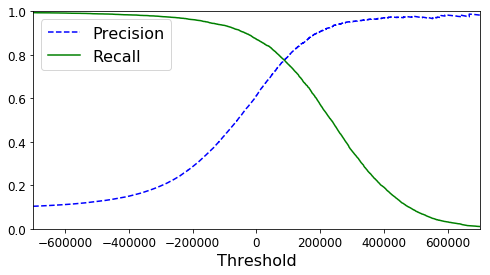

In [64]:
def plot_precision_recall_vs_threshold(precisions,recalls,thresholds):
    plt.plot(thresholds,
             precisions[:-1],
            "b--",
            label="Precision")
    
    plt.plot(thresholds,
             recalls[:-1],
            "g-",
            label="Recall")
    plt.xlabel("Threshold",fontsize=16)
    plt.legend(loc="upper left",fontsize=16)
    plt.ylim([0,1])
    
plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions,recalls,thresholds)
plt.xlim([-700000, 700000])
plt.show()

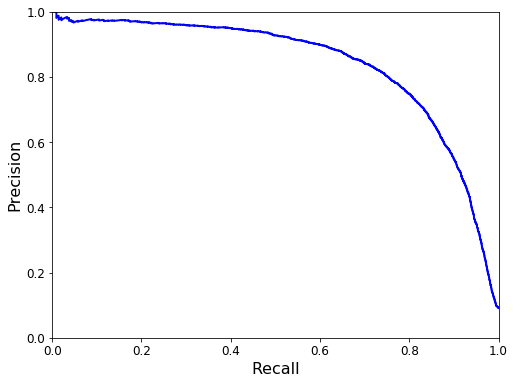

In [66]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, 
             precisions, 
             "b-", 
             linewidth=2)
    
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.show()